In [4]:
import os
import sys

import pandas as pd
import geopandas as gpd
from shapely import wkt

import matplotlib.pyplot as plt

In [93]:
gdf = gpd.read_file('Census_Tracts_2010.geojson')

In [66]:
# B01001_001E, B01001H_001E, B01001I_001E, B01001B_001E, B01001D_001E
# Total, White not Hispanic, Hispanic, Black, Asian
var = ['B01001_001E', 'B01001H_001E', 'B01001I_001E', 'B01001B_001E', 'B01001D_001E']
dats = []
for var_ in var:
    url = 'https://api.census.gov/data/2017/acs/acs5?get={},NAME&for=tract:*&in=state:42%20county:*'.format(var_)
    print('Loading {} data'.format(var_))
    dat = pd.read_json(url)
    col_name = [n for n in dat.iloc[0]]
    dat.columns = col_name
    dat.drop(dat.head(1).index, inplace=True)

    dat['cd'] = dat.state + dat.county + dat.tract
    dats.append(dat)

Loading B01001_001E data
Loading B01001H_001E data
Loading B01001I_001E data
Loading B01001B_001E data
Loading B01001D_001E data


In [74]:
var

['B01001_001E', 'B01001H_001E', 'B01001I_001E', 'B01001B_001E', 'B01001D_001E']

In [89]:
[v+'_x' for v in var]

['B01001_001E_x',
 'B01001H_001E_x',
 'B01001I_001E_x',
 'B01001B_001E_x',
 'B01001D_001E_x']

In [95]:
for dat,var_ in zip(dats, var):
    gdf = gdf.merge(dat, left_on='GEOID10', right_on='cd')
    
gdf = gdf[['GEOID10', 'geometry'] + [v+'_x' for v in var]]

In [96]:
gdf.columns

Index(['GEOID10', 'geometry', 'B01001_001E_x', 'B01001H_001E_x',
       'B01001I_001E_x', 'B01001B_001E_x', 'B01001D_001E_x'],
      dtype='object')

In [98]:
gdf.columns = ['id', 'geometry', 'total', 'white', 'hispanic', 'black', 'asian']

In [112]:
gdf.head()

id                                           geometry total white  \
0  42101009400  POLYGON ((-75.22926522780659 39.9605446656843,...  4157    32   
1  42101009500  POLYGON ((-75.2353591940378 39.9685190282368, ...  3135    27   
2  42101009600  POLYGON ((-75.2434277968255 39.9622970641896, ...  4673    66   
3  42101013800  POLYGON ((-75.17340780671741 39.977792764172, ...  1840   270   
4  42101013900  POLYGON ((-75.1731295290552 39.9777597701621, ...  2603   530   

  hispanic black asian  
0       71  3888     0  
1      155  2856     0  
2      150  4443    26  
3       99  1389     0  
4      217  1840     7

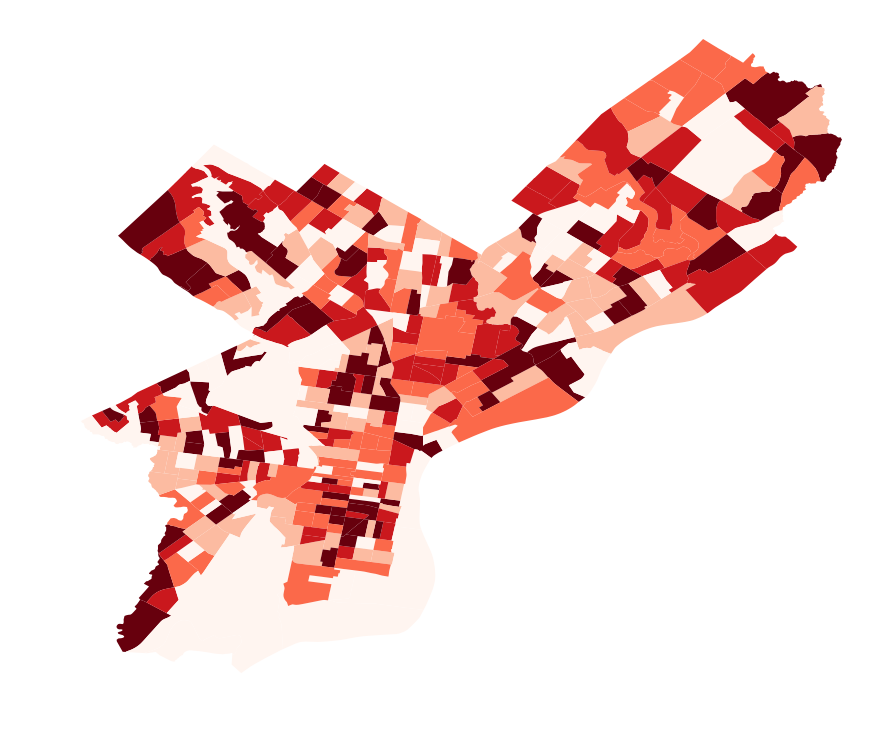

In [110]:
f, ax = plt.subplots(figsize=(15,15))
gdf.plot(ax=ax, column='hispanic', cmap='Reds', scheme='quantiles').axis('off');

In [117]:
gdf.to_file('racial_map.shp', driver='ESRI Shapefile')

In [23]:
for col in gdf.columns[1:6].to_list():
    gdf['{}'.format(col)] = gdf['{}'.format(col)].astype(float)

In [47]:
import folium
import jenkspy

var = ['white', 'black', 'hispanic', 'asian']
ms = []
for v in var:
    m = folium.Map([39.998700, -75.157900], zoom_start=11, tiles='cartodbpositron')
    breaks = jenkspy.jenks_breaks(gdf[v], nb_class=5)
    m.choropleth(geo_data=gdf.to_json(), data=gdf,
                 columns=['id', v],
                 key_on='feature.properties.id',
                 fill_color='Reds',
                 bins = breaks
                )
    ms.append(m)

# WHITE non Hispanic

In [48]:
ms[0]

# BLACK

In [49]:
ms[1]

# HISPANIC

In [50]:
ms[2]

# ASIAN

In [51]:
ms[3]